## Linear Regression-II

----------------------------------------------------------------

Author: Dr. Sampath Lonka

Date: August 2, 2022

----------------------------------------------------------------


In this tutorial, we discuss the following concepts:

1. Types of Data Variables
2. Transformation of Features
   
   2.1 One-Hot Encoding/Ordinal Encoding
   
   2.2 Feature Scaling
   
   2.3 Transformation Pipelines
3. Performance Measures for Regression
4. Training through Gradient Descent 
5. Optimal Model: Subset selection (or selection of features)
6. Optimal Model

----------------------------------------------------------------


The following topics can be discussed in the next tutorial (`linear_regression-III`).
   1. Cross-Validation
   2. Regularization
   3. Fine-Tuning the model  

### 1. Types of Features
- Features are often classified based on the arithmetic properties they support.
- There are two types of features: Continuous and Discrete.
- Features which are continuous assumes any real numbers.
- Features which are discrete takes only a particular value from the set of possible values.
- Discrete features furthur divided into different categories: *Nominal Features*, *Ordinal Features*.
- Nominal (data) features can take any arbitrary nonnumerical values. This kind of data can neither be measured nor compared. For instance, names, adress, gender, etc., can be consider as nominal data attributes.
- There is no arithmetic operations can be applied on nominal data. 
- Ordinal data attributes assumes the values which has an order. For instance, T-shirt sizes (S, M, L, XL, etc.), Likert scale in customer survey (Always, Sometimes, Rarely, Never), and so on are examples of ordinal data.  


### 2. Transformation

- Most of the ML algorithms prefer to work with numbers.
- Thus we need to learn different encoding techniques for Categorical features (Nominal or Ordinal) to convert from text to numbers.

#### 2.1 Transforming Nominal/Ordinal Attributes

- In the attribute **Gender**, we may have three values - Male, Female, and Other.
- This is a Nominal attribute as arithmetic operations can't applied, and we can't compute the values with each other.
- Consider the following snippet:

In [55]:
import pandas as pd
df = pd.DataFrame([["Ramana","Male",28,"Bachelors"],
["Arnav Sharma","Male",23,"Masters"],
["Sourav","Other", 30,"Doctoral"],
["Sophia","Female",19,"High School"]], columns=['Name','Gender','Age',
'Degree'])
df1 = df.copy()

In [56]:
df1

,Name,Gender,Age,Degree
0,Ramana,Male,28,Bachelors
1,Arnav Sharma,Male,23,Masters
2,Sourav,Other,30,Doctoral
3,Sophia,Female,19,High School


In [57]:
df

,Name,Gender,Age,Degree
0,Ramana,Male,28,Bachelors
1,Arnav Sharma,Male,23,Masters
2,Sourav,Other,30,Doctoral
3,Sophia,Female,19,High School


- In the above dataframe, `Gender` attribute is *nominal* where as `Degree` attribute is Ordinal.
- To convert categorical variables into numeric,we perform the *One-Hot Encoding* for the *nominal* attribute and *Ordinal Encoding* for the ordinal attribute.

In [58]:
#load the one-hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
encoder_gender = OneHotEncoder().fit(df1[['Gender']])

In [59]:
encoder_gender.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [60]:
gender_values = encoder_gender.transform(df1[['Gender']])
gender_values.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [61]:
df1[['Gender_F','Gender_M','Gender_O']] = gender_values.toarray()

In [62]:
df1

,Name,Gender,Age,Degree,Gender_F,Gender_M,Gender_O
0,Ramana,Male,28,Bachelors,0.0,1.0,0.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0
2,Sourav,Other,30,Doctoral,0.0,0.0,1.0
3,Sophia,Female,19,High School,1.0,0.0,0.0


In [63]:
#load the ordinal encoder from skelarn
from sklearn.preprocessing import OrdinalEncoder
encoder_education = OrdinalEncoder()
encoder_education.fit_transform(df[["Degree"]])
encoder_education.categories_

[array(['Bachelors', 'Doctoral', 'High School', 'Masters'], dtype=object)]

In [64]:
df1[["Degree_Encoded"]] = encoder_education.fit_transform(df[["Degree"]]) 
df1

,Name,Gender,Age,Degree,Gender_F,Gender_M,Gender_O,Degree_Encoded
0,Ramana,Male,28,Bachelors,0.0,1.0,0.0,0.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0,3.0
2,Sourav,Other,30,Doctoral,0.0,0.0,1.0,1.0
3,Sophia,Female,19,High School,1.0,0.0,0.0,2.0


We except an order as High School>Bachelors>Masters>Doctoral. We initialize based on our expectation.  


In [65]:
encoder_for_education = OrdinalEncoder(categories = [['High School','Bachelors','Masters','Doctoral']])
df1[['Degree_encoded']] = encoder_for_education.fit_transform(df1[['Degree']])

In [66]:
df1

,Name,Gender,Age,Degree,Gender_F,Gender_M,Gender_O,Degree_Encoded,Degree_encoded
0,Ramana,Male,28,Bachelors,0.0,1.0,0.0,0.0,1.0
1,Arnav Sharma,Male,23,Masters,0.0,1.0,0.0,3.0,2.0
2,Sourav,Other,30,Doctoral,0.0,0.0,1.0,1.0,3.0
3,Sophia,Female,19,High School,1.0,0.0,0.0,2.0,0.0


Now we converted the attributes `Gender` and `Degree` as numeric. We an drop them along with the `Name` attribute.

In [67]:
df1.drop(columns=["Name","Gender","Degree"],inplace=True)
df1

,Age,Gender_F,Gender_M,Gender_O,Degree_Encoded,Degree_encoded
0,28,0.0,1.0,0.0,0.0,1.0
1,23,0.0,1.0,0.0,3.0,2.0
2,30,0.0,0.0,1.0,1.0,3.0
3,19,1.0,0.0,0.0,2.0,0.0


In [68]:
df2 = df1.copy()
df2

,Age,Gender_F,Gender_M,Gender_O,Degree_Encoded,Degree_encoded
0,28,0.0,1.0,0.0,0.0,1.0
1,23,0.0,1.0,0.0,3.0,2.0
2,30,0.0,0.0,1.0,1.0,3.0
3,19,1.0,0.0,0.0,2.0,0.0


### 2.2 Transformation of numerical attributes: Feature Scaling

- Most important transformations to apply to data is *feature scaling*
- In some cases, if the input numerical features have very different scales, the ML algorithm doesn't perform well. 
- We prefer to use the same scaling for all the input features. 
- There are two common ways to get all features to have the same scale: *min max scaling* (or sometimes called as *Normalization* ) and *standardization*.
- In normalization, values are shifted and rescaled so that they end up ranging from 0 to 1.  
$$ x \rightarrow x_{normalized}={x-x_{min}\over x_{max}-x_{min}}$$ 
- In standardization, values are shifted and rescaled so that they end up the datapoints have mean 0 and standard deviation 1. 
$$x\rightarrow x_{std} = {x-\bar{x}\over s}$$

In [69]:
import numpy as np 
#load an array
x = np.array([[1,2,3,10,-1],[1,-10, 4, 6,8]])
#normalization
xnorm = (x-np.min(x))/(np.max(x)-np.min(x)) 
print(f"The normalization of x:\n {xnorm}")

xstd = (x-np.mean(x))/np.std(x)
print(f"The Standardization of x:\n {xstd}")

The normalization of x:
 [[0.55 0.6  0.65 1.   0.45]
 [0.55 0.   0.7  0.8  0.9 ]]
The Standardization of x:
 [[-0.26726124 -0.07636035  0.11454053  1.45084674 -0.64906302]
 [-0.26726124 -2.367171    0.30544142  0.68724319  1.06904497]]


Scikit-Learn provides functions for these transformers namely `MinMaxScaler` and `StandardScaler` 

In [70]:
#load mini-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1[['Age']])
df1['Age'] = scaler.transform(df1[['Age']])
df1

,Age,Gender_F,Gender_M,Gender_O,Degree_Encoded,Degree_encoded
0,0.818182,0.0,1.0,0.0,0.0,1.0
1,0.363636,0.0,1.0,0.0,3.0,2.0
2,1.000000,0.0,0.0,1.0,1.0,3.0
3,0.000000,1.0,0.0,0.0,2.0,0.0


In [71]:
#load StandardScalar from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df2[['Age']])
df2['Age'] = scaler.transform(df2[['Age']])
df2 

,Age,Gender_F,Gender_M,Gender_O,Degree_Encoded,Degree_encoded
0,0.697486,0.0,1.0,0.0,0.0,1.0
1,-0.464991,0.0,1.0,0.0,3.0,2.0
2,1.162476,0.0,0.0,1.0,1.0,3.0
3,-1.394972,1.0,0.0,0.0,2.0,0.0


### 2.3 Transformation Pipelines

- A sequence of data processing components is called a data `pipeline`.
- Pipelines are very common in Machine Learning systems, since there is lot of data to manipulate and many data transformations to apply. 
- Scikit-Learn provides the `Pipeline` class to help with sequence of transformations. 
- In Scikit-Learn version 0.20 introduced `ColumnTransformer` class, which helps to preprocess categorical and numerical features at the same time.
- Look at the snippet of code:


In [72]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("std_scaler",StandardScaler())
])
cat_attributes = ["Gender","Degree"]
num_attributes = ["Age"] 

encoder_for_education = OrdinalEncoder(categories = [['High School','Bachelors','Masters','Doctoral']])

full_pipeline = ColumnTransformer([
    ("num",StandardScaler(),["Age"]),
    ("One-hot",OneHotEncoder(),["Gender"]),
    ("ordinal",encoder_for_education,["Degree"])
])

df_prep = full_pipeline.fit_transform(df)
print(df_prep)
type(df_prep)

[[ 0.69748583  0.          1.          0.          1.        ]
 [-0.46499055  0.          1.          0.          2.        ]
 [ 1.16247639  0.          0.          1.          3.        ]
 [-1.39497166  1.          0.          0.          0.        ]]


numpy.ndarray

In [73]:
pd.DataFrame(df_prep, columns=["Age","GF","GM","GO","Degree"])

,Age,GF,GM,GO,Degree
0,0.697486,0.0,1.0,0.0,1.0
1,-0.464991,0.0,1.0,0.0,2.0
2,1.162476,0.0,0.0,1.0,3.0
3,-1.394972,1.0,0.0,0.0,0.0


### 3. Performance Measures

For regression problems the typical performance measure is the **Root Mean Square Error** (RMSE). Also known as **Residual Sum of Squares** (RSS) which is defined as below:
$$RMSE({\bf X}, w) = \sqrt{{1\over n}\sum_{i=1}^n\Big(y^{(i)}-f({\bf x}^{(i)})\Big)^2} ={1\over \sqrt{n}}\|y-f({\bf X})\|_2 $$
-  $n$ is the number of observations in the dataset
-  ${\bf x}^{(i)}$ is a vector of all the feature values of the $i^{\text{th}}$ instance in the dataset, and $y^{(i)}$ is its label.
-  ${\bf X}$ is a matrix containg all the feature values of all instances in the dataset.
-  $f$ is the prediction function, also called the `hypothesis`.
-  The predicted output for the instance ${\bf x}^{(i)}$ is denoted as $\hat{y}^{(i)}=f({\bf x}^{(i)}).$

There is another performance measure for regression tasks, which is called **Mean Absolute Error** (MAE), defined as  
$$MAE({\bf X}, w) = {1\over n}\sum_{i=1}^n\Big|\Big(y^{(i)}-f({\bf x}^{(i)})\Big)\Big|={1\over n}\|y-f({\bf X})\|_1. 

Both the RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

- We can use higher the norm index instead of $\ell_1$ or $\ell_2$ norms.
- If the norm index is higher, it focuses on large values and neglect small ones.
- Thus the RMSE is more sensitive to outliers than the MAE. 
- When the outliers are exponentially rare, the RMSE performs very well and is generally preferred.


## 4. Gradient Descent

We optimize our loss function $L({\bf X},w)={1\over 2n}\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2$ using Gradient Descent algorithm.

In [74]:
#load the libraries
import numpy as np
import pandas as pd

In [75]:
#load the dataset
credit = pd.read_csv("E:\MDSC-ML\MDSC-ML-Lab\Datasets\Credit.csv")
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


The dataset can be find [here](https://www.statlearning.com/resources-second-edition).

In [76]:
#convert Nomial features into numeric using OheHot encoding
credit = pd.get_dummies(credit, columns = ['Own', 'Student','Married','Region'],drop_first = True)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Own_Yes,Student_Yes,Married_Yes,Region_South,Region_West
0,14.891,3606,283,2,34,11,333,0,0,1,1,0
1,106.025,6645,483,3,82,15,903,1,1,1,0,1
2,104.593,7075,514,4,71,11,580,0,0,0,0,1
3,148.924,9504,681,3,36,11,964,1,0,0,0,1
4,55.882,4897,357,2,68,16,331,0,0,1,1,0


In [77]:
credit.iloc[:,2]

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [78]:
y = credit.Balance
X = credit.drop(columns=["Balance"])

In [79]:
#X = credit[["Income","Limit","Rating","Cards","Age","Student_Yes"]]

In [80]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

In [81]:
type(ytrain)

pandas.core.series.Series

In [82]:
#feature scaling
#use pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('num',StandardScaler())
])  

Xtrain = num_pipeline.fit_transform(Xtrain)  
#credit_new = pd.DataFrame(credit_prep,columns = credit.columns) 
#credit_new.head()

In [83]:
ytrain.shape

(320,)

In [84]:
Xtest = num_pipeline.fit_transform(Xtest) 

In [85]:
Xtest.shape

(80, 11)

In [86]:
#loss function
def loss_function(X,y,w):
    #initialization of useful values
    m = X.shape[0]
        #loss function
    f = X @ w
    y = np.array(y)
    #h = f-y
    #print(h.shape)
    RS = (y-f).T@(y-f)
    L = (1.0/2*m)* RS 
    return L[0][0]

In [87]:
w = np.random.random((11,1))
loss_function(Xtrain,ytrain,w)

33758611525.600582

In [88]:
w = np.random.random((11,1))
#print(w.shape)
#print(Xtrain.shape)
L = loss_function(Xtrain,ytrain,w)
print(L)

33758743794.361687


In [89]:
def gradient_descent(X,y,lr=0.03, num_iter=20):
    #Initialization of useful values
    m,k = X.shape 
    y = np.array(y).reshape(-1,1)
    
    #print(X.shape)
    w = np.random.random((k,1))
    #print(w.shape)
    loss_list = []  
    
    for i in range(num_iter):
        f = X @ w 
        gradient = (1.0/m)*(X.T@(f-y))
        w1 = w - lr * gradient 
        #w1.to_numpy()
       
        #saving values for plots
        loss =  loss_function(X,y,w1)
        #print(type(loss))
        print(f"The loss at the iteration {i} is {loss}")
        loss_list.append(loss)
        w = w1
    return w, loss_list       

In [90]:
w1, l1 = gradient_descent(Xtrain,ytrain,0.1,250)
print(w1)

The loss at the iteration 0 is 19846487339.70803
The loss at the iteration 1 is 18090072040.853733
The loss at the iteration 2 is 17069394833.459301
The loss at the iteration 3 is 16445814234.863384
The loss at the iteration 4 is 16040081740.12289
The loss at the iteration 5 is 15756765990.080154
The loss at the iteration 6 is 15544614542.909027
The loss at the iteration 7 is 15375743527.297544
The loss at the iteration 8 is 15234695619.772911
The loss at the iteration 9 is 15112673730.443192
The loss at the iteration 10 is 15004491899.113312
The loss at the iteration 11 is 14906954815.182676
The loss at the iteration 12 is 14817990127.5721
The loss at the iteration 13 is 14736178740.147705
The loss at the iteration 14 is 14660496552.701761
The loss at the iteration 15 is 14590169359.177969
The loss at the iteration 16 is 14524588946.022175
The loss at the iteration 17 is 14463262792.15754
The loss at the iteration 18 is 14405782606.301582
The loss at the iteration 19 is 14351803721.27

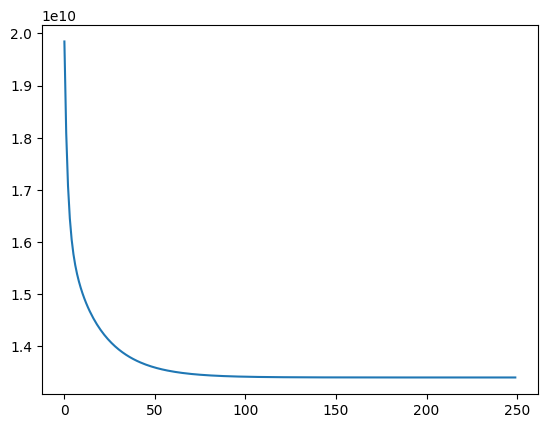

In [91]:
import matplotlib.pyplot as plt
#plot the loss function
x = range(250)
plt.plot(x,l1)
plt.show()

In [92]:
print(f"The weights are:\n {w1}")

The weights are:
 [[-270.8207545 ]
 [ 303.40253472]
 [ 290.66292301]
 [  17.31137494]
 [  -7.93525326]
 [  -2.23215593]
 [  -0.81402046]
 [ 123.14461506]
 [  -7.36791875]
 [   8.16137418]
 [  15.20786972]]


In [93]:
def predict_lm(X,w):
    yhat = X @ w 
    return yhat  

In [94]:
Xtest.shape

(80, 11)

In [95]:
type(ytest)

pandas.core.series.Series

In [96]:
Index = ytest.index

In [97]:
yhat = predict_lm(Xtest,w1)
y_hat = pd.DataFrame(yhat,columns=["yhat"],index=Index)  
#print(y_hat)

In [98]:
type(yhat)

numpy.ndarray

In [99]:
#y_hat.merge(ytest.rename('ytest'), left_index=True, right_index=True)
# If series is already named,
y_hat.merge(ytest, left_index=True, right_index=True)

,yhat,Balance
133,322.039531,1018
56,-111.955830,379
179,522.809244,1237
345,-749.924244,0
169,411.678411,1099
...,...,...
26,86.472025,654
293,785.243354,1677
260,-142.833449,345
381,221.303688,849


### 4. Choosing Optimal Model: Subset Selection

We not satisfied with the least square estimation for regression model due to the following reasons:
- *Prediction Accuracy*: The estimates often has low bias but large variance. The prediction accuracy can be improved (sometimes) by shrinking or setting some parameters to zero.
- *Interpretation*: With the large number of input features, we often would like to determine a smaller subset of features which exibits the strongest effects.    

In this section, we discuss different approaches to variable subset selction with linear regression. There are three different strategies to choose the subset. Namely:
- Best-Subset Selection
- Forward-Stepwise Selection
- Backward-Stepwise Selection

**Best-Subset Selection**: Best subset regression finds for each $m\in\{0,1,2,\ldots,k\}$ the subset of size $m$ that gives smallest residual sum of squares (RSS). The question of how to choose $m$ involves the tradeoff between bias and variance.
This is infeasible for $k>>40.$


**Forward-Stepwise Selection**: Forward-stepwise selection starts with the intercept, and then sequentially adds into the model the predictor that most improves the fit. This method produces a sequence of models indexed by $m,$ the subset size.


**Back-Stepwise Selection**: It starts with the full model, and sequential deletes the predictor that has the least impact (smallest Z-score) on the fit.  

In [100]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [101]:
#Best selection method based on RSS
#some helper function 
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [107]:
#import tqdm for progress bar 
from tqdm import trange, tqdm_notebook
from tqdm.notebook import tnrange
import itertools

#Initialize variables 
y = credit.Balance
X = credit.drop(columns='Balance',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
numb_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in trange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'Adj_R_squared': adj_R_squared_list, 'features':feature_list})























































Loop...: 100%|██████████| 11/11 [00:10<00:00,  1.08it/s]


##### Find the best subsets using RSS

In [108]:
df

,numb_features,RSS,R_squared,Adj_R_squared,features
0,1,6.620874e+07,0.214977,0.213005,"(Income,)"
1,1,2.171566e+07,0.742522,0.741875,"(Limit,)"
2,1,2.143512e+07,0.745848,0.745210,"(Rating,)"
3,1,8.370950e+07,0.007475,0.004981,"(Cards,)"
4,1,8.433963e+07,0.000003,-0.002509,"(Age,)"
...,...,...,...,...,...
2042,10,3.949432e+06,0.953172,0.951969,"(Income, Limit, Rating, Age, Education, Own_Ye..."
2043,10,3.839044e+06,0.954481,0.953311,"(Income, Limit, Cards, Age, Education, Own_Yes..."
2044,10,4.117780e+06,0.951176,0.949921,"(Income, Rating, Cards, Age, Education, Own_Ye..."
2045,10,1.461789e+07,0.826679,0.822223,"(Limit, Rating, Cards, Age, Education, Own_Yes..."


In [109]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
df_max_adj = df[df.groupby('numb_features')['Adj_R_squared'].transform(max) == df['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head(10))

,numb_features,RSS,R_squared,Adj_R_squared,features
2,1,2.143512e+07,0.745848,0.745210,"(Rating,)"
12,2,1.053254e+07,0.875118,0.874489,"(Income, Rating)"
79,3,4.227219e+06,0.949879,0.949499,"(Income, Rating, Student_Yes)"
242,4,3.915058e+06,0.953580,0.953110,"(Income, Limit, Cards, Student_Yes)"
564,5,3.866091e+06,0.954161,0.953579,"(Income, Limit, Rating, Cards, Student_Yes)"


,numb_features,RSS,R_squared,Adj_R_squared,features
2,1,2.143512e+07,0.745848,0.745210,"(Rating,)"
12,2,1.053254e+07,0.875118,0.874489,"(Income, Rating)"
79,3,4.227219e+06,0.949879,0.949499,"(Income, Rating, Student_Yes)"
242,4,3.915058e+06,0.953580,0.953110,"(Income, Limit, Cards, Student_Yes)"
564,5,3.866091e+06,0.954161,0.953579,"(Income, Limit, Rating, Cards, Student_Yes)"
1025,6,3.821620e+06,0.954688,0.953996,"(Income, Limit, Rating, Cards, Age, Student_Yes)"
1490,7,3.810759e+06,0.954817,0.954010,"(Income, Limit, Rating, Cards, Age, Own_Yes, S..."
1827,8,3.804746e+06,0.954888,0.953965,"(Income, Limit, Rating, Cards, Age, Own_Yes, S..."
1991,9,3.798367e+06,0.954964,0.953924,"(Income, Limit, Rating, Cards, Age, Own_Yes, S..."
2040,10,3.791345e+06,0.955047,0.953891,"(Income, Limit, Rating, Cards, Age, Own_Yes, S..."


In [110]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared
0,1,6.620874e+07,0.214977,0.213005,"(Income,)",2.143512e+07,0.745848
1,1,2.171566e+07,0.742522,0.741875,"(Limit,)",2.143512e+07,0.745848
2,1,2.143512e+07,0.745848,0.745210,"(Rating,)",2.143512e+07,0.745848
3,1,8.370950e+07,0.007475,0.004981,"(Cards,)",2.143512e+07,0.745848
4,1,8.433963e+07,0.000003,-0.002509,"(Age,)",2.143512e+07,0.745848


In [111]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df['max_Adj_R_squared'] = df.groupby('numb_features')['Adj_R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,Adj_R_squared,features,min_RSS,max_R_squared,max_Adj_R_squared
0,1,6.620874e+07,0.214977,0.213005,"(Income,)",2.143512e+07,0.745848,0.74521
1,1,2.171566e+07,0.742522,0.741875,"(Limit,)",2.143512e+07,0.745848,0.74521
2,1,2.143512e+07,0.745848,0.745210,"(Rating,)",2.143512e+07,0.745848,0.74521
3,1,8.370950e+07,0.007475,0.004981,"(Cards,)",2.143512e+07,0.745848,0.74521
4,1,8.433963e+07,0.000003,-0.002509,"(Age,)",2.143512e+07,0.745848,0.74521


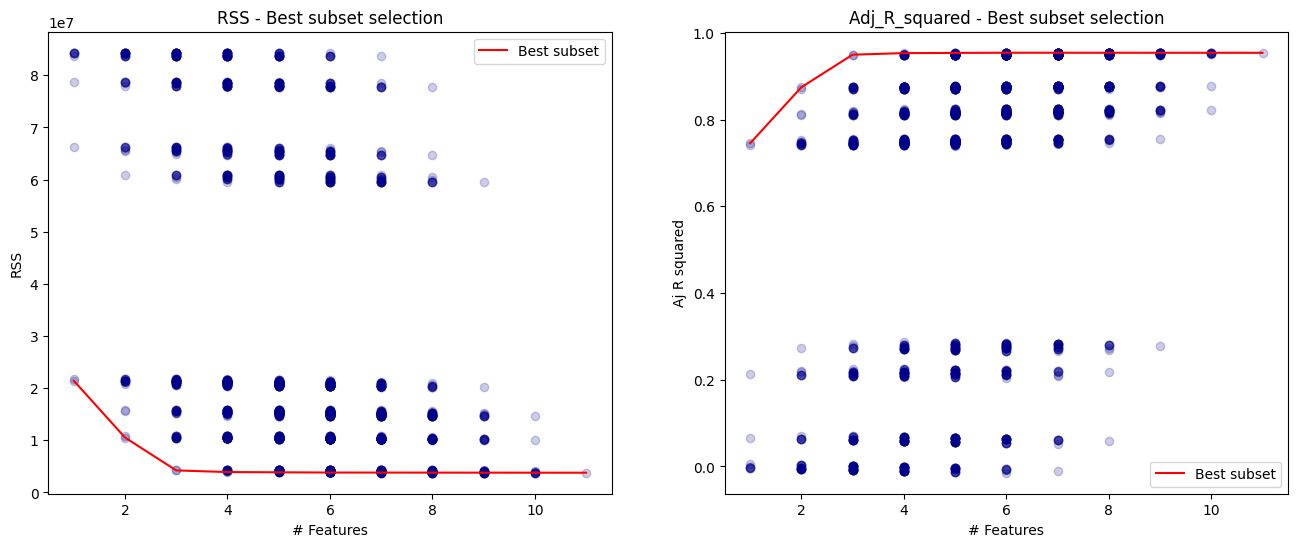

In [112]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.Adj_R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_Adj_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('Aj R squared')
ax.set_title('Adj_R_squared - Best subset selection')
ax.legend()

plt.show()

By observing these plots we can choose $m=6.$ Thus the features part of the linear regression model will be `(Income, Limit, Rating, Cards, Age, Student_Yes)`

Exception ignored in: <function tqdm.__del__ at 0x0000029AF8D31A20>
Traceback (most recent call last):
  File "c:\Users\Sampath\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\Sampath\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000029AF8D31A20>
Traceback (most recent call last):
  File "c:\Users\Sampath\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "c:\Users\Sampath\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 

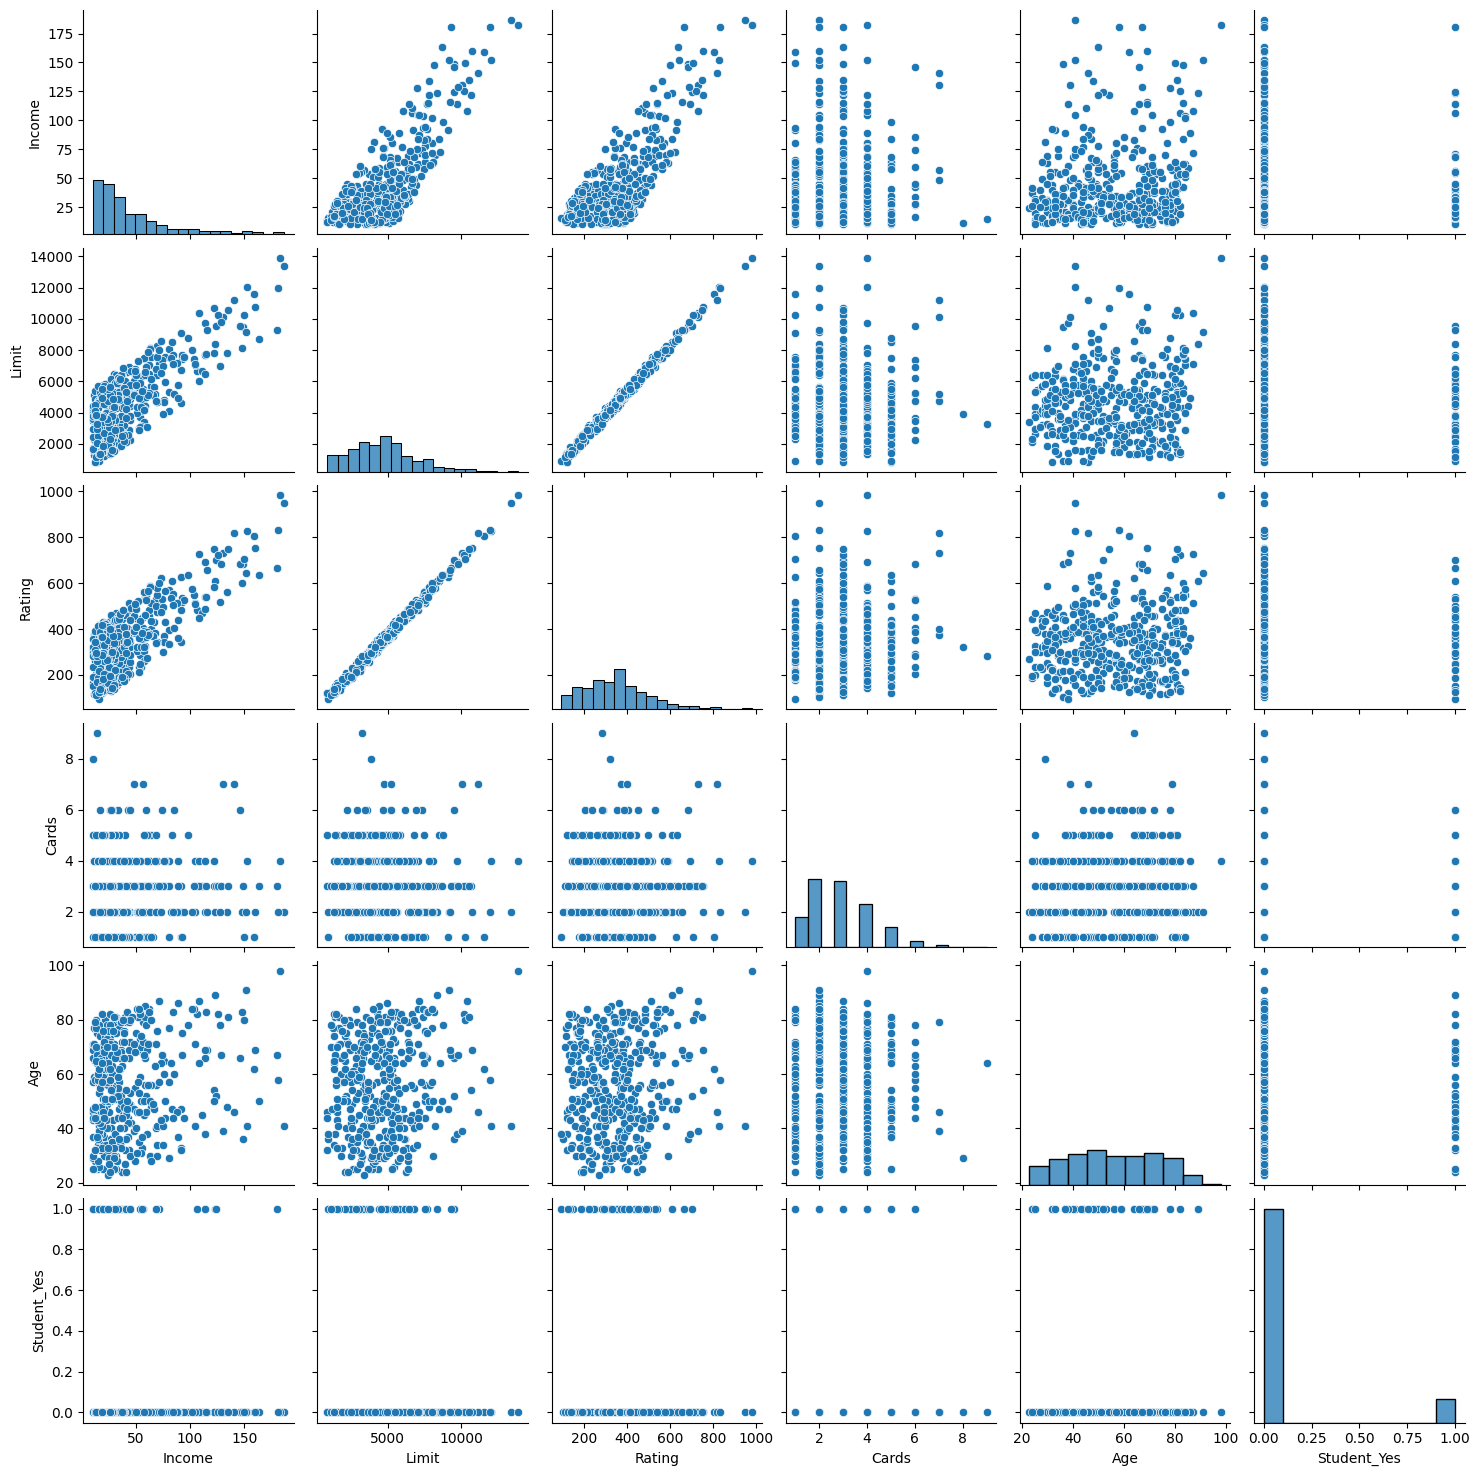

In [113]:
import seaborn as sns 

sns.pairplot(credit[["Income","Limit","Rating","Cards","Age","Student_Yes"]])

### 5. Model Implementation

In [114]:
#modeling
from sklearn.model_selection import train_test_split

X = credit[["Income","Limit","Rating","Cards","Age","Student_Yes"]]
y = credit.Balance

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [115]:
model = LinearRegression() 
model.fit(Xtrain,ytrain)  
model

LinearRegression()

In [116]:
def adj_r_sqr(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [117]:
adj_r_sqr(Xtrain,ytrain,Xtest,ytest)

(0.9531679021639907, 0.9527892790658871)

In [118]:
model.score(Xtrain,ytrain)

0.9540487566687432

In [119]:
model.score(Xtest,ytest)

0.9563749034406298

In [120]:
yhat = model.predict(Xtest)
results= pd.DataFrame({"y":ytest,"yhat":yhat})
results.head()

,y,yhat
389,806,776.507117
18,891,833.770876
104,745,745.167743
7,872,868.226879
199,571,592.291489


In [121]:
#load lasso regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [123]:
X

array([[-0.86158299, -0.48999879, -0.46553881, -0.6991298 , -1.2576741 ,
        -0.33333333],
       [ 1.72743711,  0.82826106,  0.82870309,  0.03103187,  1.5284506 ,
         3.        ],
       [ 1.68675551,  1.01478681,  1.02931059,  0.76119355,  0.88996369,
        -0.33333333],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285,  1.49135522,  0.65778663,
        -0.33333333],
       [-0.21280808, -0.95891584, -1.05441888, -1.42929148, -0.67723146,
        -0.33333333],
       [-0.75334493,  0.34199278,  0.38866085,  1.49135522,  0.48365384,
        -0.33333333]])

In [124]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [125]:
def adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest):
    model = LinearRegression()  
    model.fit(Xtrain,ytrain)
    r_2_train = model.score(Xtrain,ytrain)
    r_2_test = model.score(Xtest,ytest)
    adj_r_2_train =  1 - (1-r_2_train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
    adj_r_2_test =  1 - (1-r_2_test)*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)  
    return adj_r_2_train,adj_r_2_test

In [126]:
adj_r_sqr_lasso(Xtrain,ytrain,Xtest,ytest)

(0.9575956011960628, 0.9281320094245487)